
Таблица Pays - платежи между компаниями

hash_inn_kt (переименовано в hash_inn_from) - Обезличенный ИНН отправителя
hash_inn_dt (переименовано в hash_inn_to) - Обезличенный ИНН получателя
week        - Неделя
count       - Кол-во платежей в неделю
sum         - Сумма платежей в неделю


Таблица inn_info_public - Информация по компаниям

hash_inn  -  Обезличенный ИНН
okved2    -  Обезличенная отрасль 
region    -  Обезличенный регион 
is_public -  Флаг выборка для обучения \ контрольная

В задаче необходимо для компаний с флагом -1 в поле okved2 файла inn_info_public проставить их отрасль. (Задача много-классовой классификации)

revenue - доход

ЧТо надо сделать:
- Для каждого признака: максимальное, минимальное значение, среднее, по квартилям, график разброса.
- Корелляцию (это такой график в виде матрицы)
- Определить важные признаки (можно с помощью sklearn, если верить статье)
- Залить каким-то чудом это на гитхаб

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
#from pandas_profiling import ProfileReport
#import sklearn

pays = pd.read_csv(r'D:\Dataset_Sberbank\pays.csv')\
         .rename(columns={'hash_inn_kt':'hash_inn_from','hash_inn_dt':'hash_inn_to'})\


info = pd.read_csv(r'D:\Dataset_Sberbank\inn_info_public.csv')\
         .drop('is_public', axis=1)

revenue = pays.groupby('hash_inn_to', as_index = False)\
              .agg({'sum':'sum'})\
              .rename(columns = {'hash_inn_to':'hash_inn_from','sum':'revenue'})

info_plus = pays.groupby('hash_inn_from', as_index = False)\
                .agg({'sum':'sum', 'count':'sum'})\
                .rename(columns = {'sum':'expenses', 'count':'all_count'})\
                .merge(revenue, on = 'hash_inn_from')\
                .rename(columns = {'hash_inn_from':'hash_inn'})\
                .merge(info, on='hash_inn')\
                .rename(columns =  {'hash_inn':'hash_inn_from'})\
                .sort_values('okved2')

pays_info = pays.rename(columns = {'hash_inn_from':'hash_inn'})\
                     .merge(info, on='hash_inn')\
                     .rename(columns={'hash_inn':'hash_inn_from','okved2':'okved_from','region':'region_from'})\
                     .rename(columns = {'hash_inn_to':'hash_inn'})\
                     .merge(info, on='hash_inn')\
                     .rename(columns={'hash_inn':'hash_inn_to','okved2':'okved_to','region':'region_to'})

group_info = pays_info.groupby(['hash_inn_from', 'hash_inn_to'], as_index = False)\
                      .agg({'sum':'sum', 'count':'sum', 'week':'max'})\
                      .merge(info_plus, on='hash_inn_from')

info_plus

,hash_inn_from,expenses,all_count,revenue,okved2,region
0,0,253520.588,194,172026.108,-1,84
50657,129604,1101.816,32,2232.388,-1,85
50658,129605,69957.784,65,95976.176,-1,85
50662,129613,7645346.968,2635,6348880.676,-1,84
50666,129621,2140.392,74,35.160,-1,60
...,...,...,...,...,...,...
61852,158485,82.900,17,108.480,79,85
7837,19687,543.720,27,627.312,79,85
64233,164623,146.228,15,6.000,79,85
60314,154497,51.196,10,4.368,79,85


In [2]:
pays_part = pays_info[['hash_inn_from', 'hash_inn_to', 'sum']]
pays_part

,hash_inn_from,hash_inn_to,sum
0,0,0,38399.600
1,0,0,399.600
2,0,0,79.600
3,0,0,239.600
4,0,0,79.600
...,...,...,...
5430143,260458,79174,-0.280
5430144,260458,96970,0.568
5430145,260487,143637,15254.168
5430146,260503,30189,14.160


In [3]:
pays_info.describe()

,hash_inn_from,hash_inn_to,week,count,sum,okved_from,region_from,okved_to,region_to
count,5.430148e+06,5.430148e+06,5.430148e+06,5.430148e+06,5.429025e+06,5.430148e+06,5.430148e+06,5.430148e+06,5.430148e+06
mean,1.288775e+05,1.305203e+05,1.161925e+01,2.919464e+00,3.939404e+02,1.748380e+01,6.918880e+01,1.946658e+01,7.142270e+01
std,7.569651e+04,7.564642e+04,6.332949e+00,5.050309e+00,7.259421e+03,2.188995e+01,2.438523e+01,2.187681e+01,2.378119e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e-01,-1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,6.292900e+04,6.476100e+04,6.000000e+00,1.000000e+00,3.280000e+00,-1.000000e+00,6.000000e+01,-1.000000e+00,7.700000e+01
50%,1.273810e+05,1.295880e+05,1.200000e+01,2.000000e+00,1.456800e+01,1.200000e+01,8.400000e+01,1.200000e+01,8.400000e+01
75%,1.943850e+05,1.966060e+05,1.700000e+01,3.000000e+00,6.920000e+01,2.300000e+01,8.500000e+01,3.400000e+01,8.500000e+01
max,2.605110e+05,2.605150e+05,2.300000e+01,2.530000e+03,3.966400e+06,7.900000e+01,9.000000e+01,7.900000e+01,9.000000e+01


In [4]:
group_info.describe()

,hash_inn_from,hash_inn_to,sum,count,week,expenses,all_count,revenue,okved2,region
count,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06,1.378399e+06
mean,1.294053e+05,1.304553e+05,1.506555e+03,1.094252e+01,1.533229e+01,2.498958e+05,6.410233e+03,2.365489e+05,1.821120e+01,7.049727e+01
std,7.561365e+04,7.530316e+04,4.530119e+04,3.795756e+01,6.359219e+00,9.953799e+05,2.334027e+04,1.042126e+06,2.244602e+01,2.374401e+01
min,0.000000e+00,0.000000e+00,-7.104000e+00,0.000000e+00,0.000000e+00,-1.383200e+01,0.000000e+00,-4.016000e+00,-1.000000e+00,1.000000e+00
25%,6.355500e+04,6.513450e+04,5.120000e+00,2.000000e+00,1.100000e+01,1.938836e+03,1.130000e+02,8.411440e+02,-1.000000e+00,6.000000e+01
50%,1.287070e+05,1.299390e+05,2.451600e+01,4.000000e+00,1.700000e+01,1.286007e+04,5.540000e+02,8.181784e+03,1.200000e+01,8.400000e+01
75%,1.956880e+05,1.958240e+05,1.388360e+02,1.000000e+01,2.100000e+01,8.722174e+04,2.913000e+03,5.751896e+04,2.900000e+01,8.500000e+01
max,2.605110e+05,2.605150e+05,1.866433e+07,1.391800e+04,2.300000e+01,3.340752e+07,2.303740e+05,3.474661e+07,7.900000e+01,9.000000e+01


<AxesSubplot:xlabel='okved2', ylabel='count'>

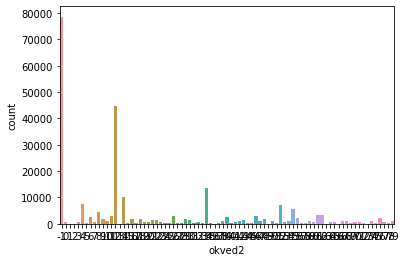

In [5]:
#Теперь мне нужны графики мухахахахаххахахаахахахахахах!!!
sns.countplot(data = info, x = 'okved2')

In [6]:
info_plus

,hash_inn_from,expenses,all_count,revenue,okved2,region
0,0,253520.588,194,172026.108,-1,84
50657,129604,1101.816,32,2232.388,-1,85
50658,129605,69957.784,65,95976.176,-1,85
50662,129613,7645346.968,2635,6348880.676,-1,84
50666,129621,2140.392,74,35.160,-1,60
...,...,...,...,...,...,...
61852,158485,82.900,17,108.480,79,85
7837,19687,543.720,27,627.312,79,85
64233,164623,146.228,15,6.000,79,85
60314,154497,51.196,10,4.368,79,85


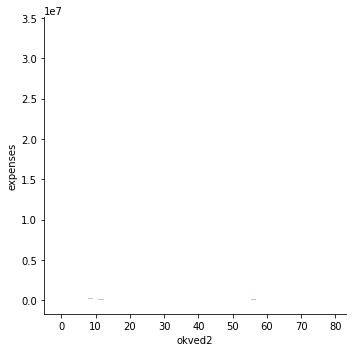

In [7]:
sns.displot(data=info_plus, x='okved2', y='expenses')

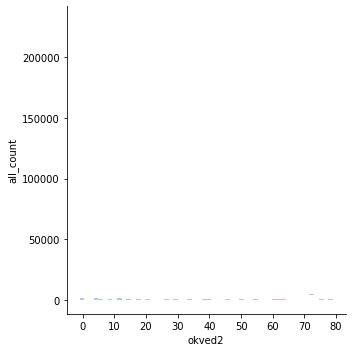

In [8]:
sns.displot(data=info_plus, x='okved2', y='all_count')

In [9]:
info_plus.sort_values('all_count')

,hash_inn_from,expenses,all_count,revenue,okved2,region
45834,117096,0.000000e+00,0,3.830800e+02,26,17
40252,102862,0.000000e+00,0,1.727600e+01,-1,84
11314,28749,-2.600000e-01,1,5.289516e+03,12,88
57823,147982,6.736000e+01,1,2.206012e+03,12,60
24494,62634,-1.120000e-01,1,1.577864e+03,0,85
...,...,...,...,...,...,...
43703,111553,2.008159e+06,58625,6.191004e+03,74,85
36429,92978,1.665645e+06,61069,2.254799e+04,9,8
99367,254311,8.575747e+06,69503,7.431684e+06,74,80
69233,177448,1.011361e+07,177969,1.195656e+07,12,85


<AxesSubplot:xlabel='okved2', ylabel='all_count'>

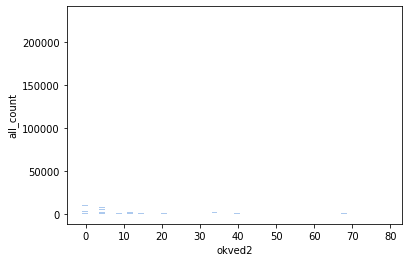

In [10]:
sns.histplot(data=info_plus, x='okved2', y='all_count')

In [11]:
?info_plus.drop

In [12]:
info_p = info_plus.drop('hash_inn_from', axis=1)\
                  .drop('region', axis=1)

In [13]:
info_p = info_p[info_p.okved2>=0]

In [14]:
info_p

,expenses,all_count,revenue,okved2
46166,222.864,18,-0.012,0
18981,103.084,8,104.252,0
11004,100.452,11,8.532,0
7163,6.000,2,39.568,0
101214,3917.380,299,2579.004,0
...,...,...,...,...
61852,82.900,17,108.480,79
7837,543.720,27,627.312,79
64233,146.228,15,6.000,79
60314,51.196,10,4.368,79


In [15]:
?sns.pairplot

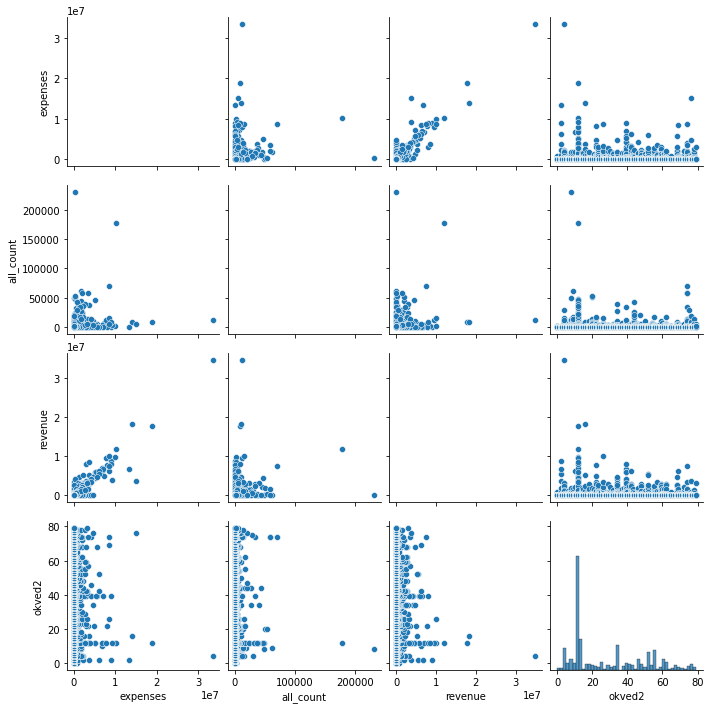

In [16]:
sns.pairplot(data=info_p)

In [ ]:
#Кажется, это совсем ничего не дает. Жесть.
#Ладно, наша задача - классификация, верно? У нас есть конкретные окведы, мы сможем назначить их как классы и потом пытаться по ближайшим найти подходящих ребят...
#Кажется, это не совсем то, что должно быть. Но пока идей лучше у меня нет.